
## Effects on Random Forest Regression

#### Feras Alsheikh
#### Petroleum and Geosystems Engineering, University of Texas at Austin

### Subsurface Machine Learning Course, The University of Texas at Austin
#### Hildebrand Department of Petroleum and Geosystems Engineering, Cockrell School of Engineering
#### Department of Geological Sciences, Jackson School of Geosciences




_____________________

Workflow supervision and review by:

#### Instructor: Prof. Michael Pyrcz, Ph.D., P.Eng., Associate Professor, The Univeristy of Texas at Austin
##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Course TA: Misael Morales, Graduate Student, The University of Texas at Austin
##### [LinkedIn](https://www.linkedin.com/in/misaelmmorales/)


### Executive Summary

This workflow explores the effects of multiple parameters on Random Forest regression. The model is built and checked using mean error multiple times with varying parameters. The goal is to visualize the mean error of the model as each parameter changes independently to learn about the behavior of the model in regards to the parameters in question. The parameters are: minimum weighted fraction in a leaf, number of features, maximum depth of trees, and number of trees.


### Import Packages

In [12]:
import numpy as np                                        # for working with data and model arrays
import pandas as pd                                       # for working with data frames
import matplotlib.pyplot as plt                           # for plots and visualizations
import pandas.plotting as pd_plot                         # for visualizing pairs of features
cmap = plt.cm.inferno 
from sklearn.ensemble import RandomForestRegressor       
from sklearn import metrics                               # to build the model and calculate MSE
import math                                               # for calculating MSE root
import warnings                                           # to suppress warnings
warnings.filterwarnings('ignore')

### Functions
The following functions will be used in the workflow.

In [6]:
def plot_corr(dataframe,size=10):           #plots correlation matrix. From Prof. Michael Pyrcz, https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/SubsurfaceDataAnalytics_EnsembleTrees.ipynb           
    corr = dataframe.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    im = ax.matshow(corr,vmin = -1.0, vmax = 1.0)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    plt.colorbar(im, orientation = 'vertical')
    plt.title('Correlation Matrix')
    

def visualize_model(model,xfeature,x_min,x_max,yfeature,y_min,y_max,response,z_min,z_max,title,): #visualize random forest model. 
#From Prof. Michael Pyrcz, https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/SubsurfaceDataAnalytics_EnsembleTrees.ipynb
    cmap = plt.cm.inferno
    xplot_step = (x_max - x_min)/300.0; yplot_step = (y_max - y_min)/300.0 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, xplot_step), 
                     np.arange(y_min, y_max, yplot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    
    Z = Z.reshape(xx.shape)
    im = plt.imshow(Z,interpolation = None,aspect = "auto",extent = [x_min,x_max,y_min,y_max], vmin = z_min, vmax = z_max,cmap     = cmap)
    if (type(xfeature) != str) & (type(yfeature) != str):
        plt.scatter(xfeature,yfeature,s=None, c=response, marker=None, cmap=cmap, norm=None, vmin=z_min, vmax=z_max, alpha=1.0,         linewidths=0.6, edgecolors="white")
        plt.xlabel(xfeature.name); plt.ylabel(yfeature.name)
    else:
        plt.xlabel(xfeature); plt.ylabel(yfeature)
    plt.title(title)                                       

    plt.xlim([x_min,x_max]); plt.ylim([y_min,y_max])
    cbar = plt.colorbar(im, orientation = 'vertical')      
    if type(response) == str:
        cbar.set_label(response, rotation=270, labelpad=20)        
    else:
        cbar.set_label(response.name, rotation=270, labelpad=20)
    return Z


def check_model(model,xfeature,yfeature,response,title):  #calculate error and plot actual vs estimate.
#From Prof. Michael Pyrcz, https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/SubsurfaceDataAnalytics_EnsembleTrees.ipynb
    predict_train = model.predict(np.c_[xfeature,yfeature])
    plt.scatter(response,predict_train,s=None, c='red',marker=None, cmap=cmap, norm=None, vmin=None, vmax=None, alpha=0.2,         linewidths=0.3, edgecolors="black")
    plt.title(title); plt.xlabel('Actual Price'); plt.ylabel('Estimated Price')
    plt.xlim(1e+04,2.5e+06); plt.ylim(1e+04,2.5e+06)
    plt.arrow(1e+04,1e+04,2.5e+06,2.5e+06,width=0.02,color='black',head_length=0.0,head_width=0.0)
    MSE = metrics.mean_squared_error(response,predict_train)
    mean_error = round(math.sqrt(MSE),2)
    Var_Explained = metrics.explained_variance_score(response,predict_train)
    cor = math.sqrt(metrics.r2_score(response,predict_train))
    print('Mean Squared Error on Testing = ', round(math.sqrt(MSE),2),', Variance Explained =', round(Var_Explained,2),'Cor =',     round(cor,2))
    return mean_error


def check_model2(model,xfeature,yfeature,response,title): #calculate error (2 predictor features)
    predict_train = model.predict(np.c_[xfeature,yfeature])
    MSE = metrics.mean_squared_error(response,predict_train)
    mean_error = round(math.sqrt(MSE),2)
    Var_Explained = metrics.explained_variance_score(response,predict_train)
    cor = math.sqrt(metrics.r2_score(response,predict_train))
    return mean_error
    
def mean_error3(model, feature1, feature2, feature3, response): #calculate error (3 predictor features)
    predict_train = model.predict(np.c_[feature1,feature2,feature3])
    MSE = metrics.mean_squared_error(response,predict_train)
    mean_error = round(math.sqrt(MSE),2)
    Var_Explained = metrics.explained_variance_score(response,predict_train)
    cor = math.sqrt(metrics.r2_score(response,predict_train))
    return mean_error

def mean_error4(model, feature1, feature2, feature3, feature4, response): #calculate error (4 predictor features)
    predict_train = model.predict(np.c_[feature1,feature2,feature3,feature4])
    MSE = metrics.mean_squared_error(response,predict_train)
    mean_error = round(math.sqrt(MSE),2)
    Var_Explained = metrics.explained_variance_score(response,predict_train)
    cor = math.sqrt(metrics.r2_score(response,predict_train))
    return mean_error

def mean_error5(model, feature1, feature2, feature3, feature4,feature5, response): #calculate error (5 predictor features)
    predict_train = model.predict(np.c_[feature1,feature2,feature3,feature4,feature5])
    MSE = metrics.mean_squared_error(response,predict_train)
    mean_error = round(math.sqrt(MSE),2)
    Var_Explained = metrics.explained_variance_score(response,predict_train)
    cor = math.sqrt(metrics.r2_score(response,predict_train))
    return mean_error

def mean_error1(model, feature1, response): #calculate error (1 predictor feature)
    predict_train = model.predict(np.c_[feature1])
    MSE = metrics.mean_squared_error(response,predict_train)
    mean_error = round(math.sqrt(MSE),2)
    Var_Explained = metrics.explained_variance_score(response,predict_train)
    cor = math.sqrt(metrics.r2_score(response,predict_train))
    return mean_error

### Load Data

The following workflow applies the .csv file 'USA_Housing.xlsx', a dataset showing average price houses in the US along with 5 predictors. The dataset is publically available [here](https://www.kaggle.com/datasets/kanths028/usa-housing)  

The dataset includes the following features:

* **Average Area Income** - Average income in an area (USD).
* **Average Area House Age** - Average house age in an area.
* **Average Area Number of Rooms** - Average number of rooms in a house in an area.
* **Average Area Number of Bedrooms** - Average number of bedrooms in a house in an area.
* **Average Area Population** - Average population in an area.
* **Price** - Average house price in an area (USD).

In [30]:
df = pd.read_csv(r"https://raw.githubusercontent.com/FerasAlsheikh/Datasets/main/USA_Housing.csv")    #loading the file from local directory.

### Effects on Random Forest Regression

### 1. Checking the data

The data is checked through histograms and correlation matrix.

In [31]:
df.describe()                                 

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


splitting training/testing (80/20)

In [33]:
df_test = df.iloc[:1000,:]
df_train = df.iloc[1000:5000, :]
df_train.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4.000000e+03
mean,68532.946375,5.957346,6.980175,3.982868,36242.441342,1.227797e+06
std,10663.931160,0.991112,1.007677,1.233854,9970.878648,3.537986e+05
min,35454.714660,2.644304,3.950225,2.000000,3285.450538,1.593866e+04
25%,61437.561930,5.300482,6.287142,3.140000,29475.398333,9.920233e+05
50%,68783.055265,5.954206,6.989618,4.050000,36244.259340,1.229341e+06
75%,75776.194155,6.620017,7.665281,4.490000,42938.440308,1.470440e+06
max,104702.724300,9.519088,10.759588,6.500000,69621.713380,2.370231e+06


Plotting corrrelation matrix:

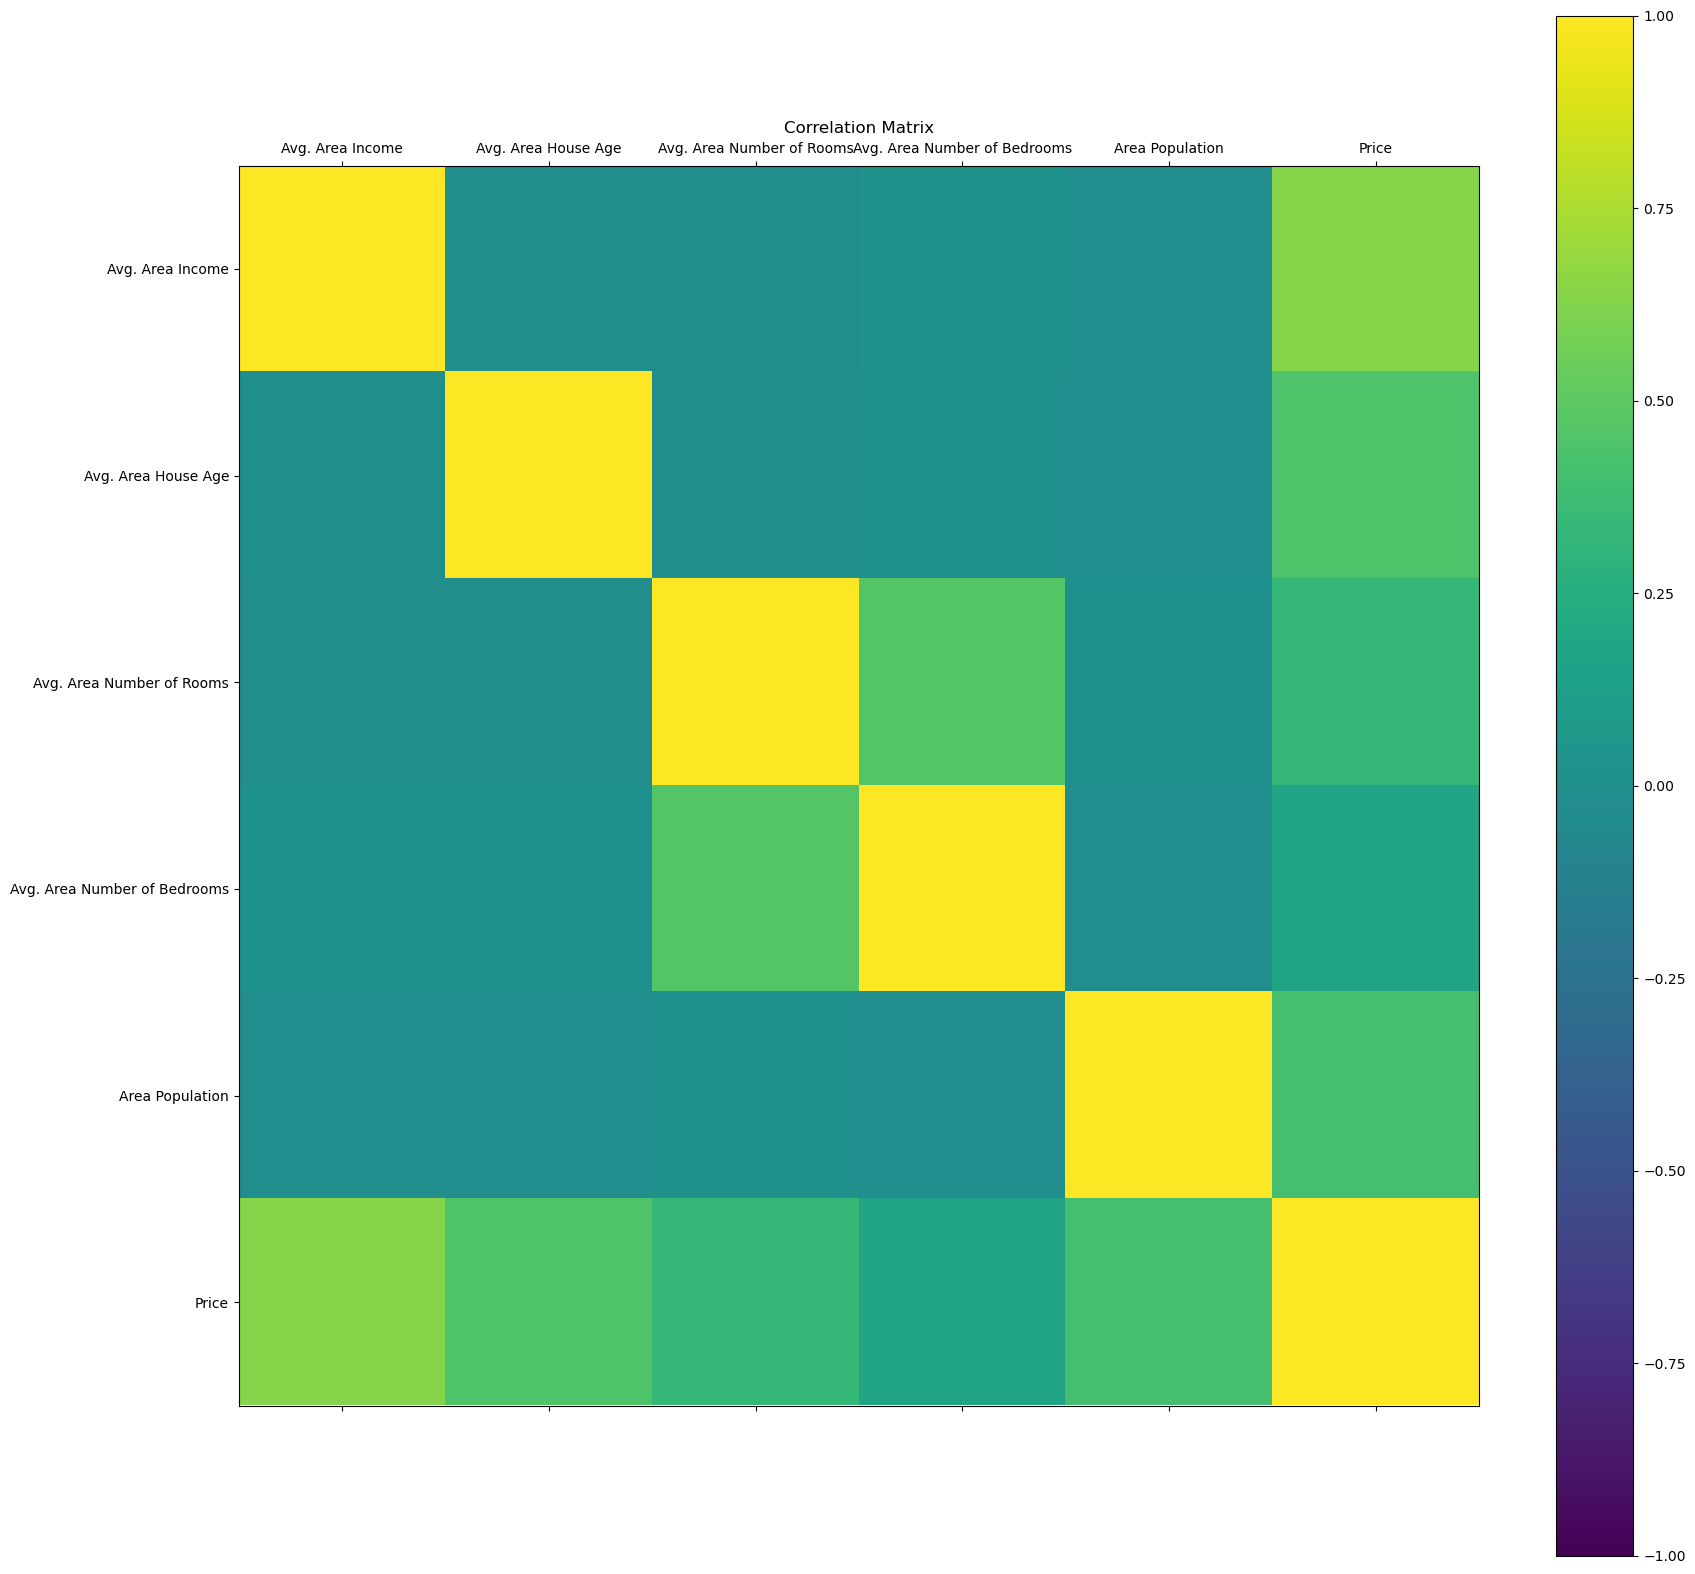

In [34]:
plot_corr(df,20)                                       
plt.show()

Price is mostly correlated with average area income, followed by average area population

Calculating maximums and minimums (for model visualization):

In [35]:
income_min = df['Avg. Area Income'].min()
income_max = df['Avg. Area Income'].max()

pop_min = df['Area Population'].min()
pop_max = df['Area Population'].max()

price_min = df['Price'].min()
price_max = df['Price'].max()

Visualizing correlation between features:

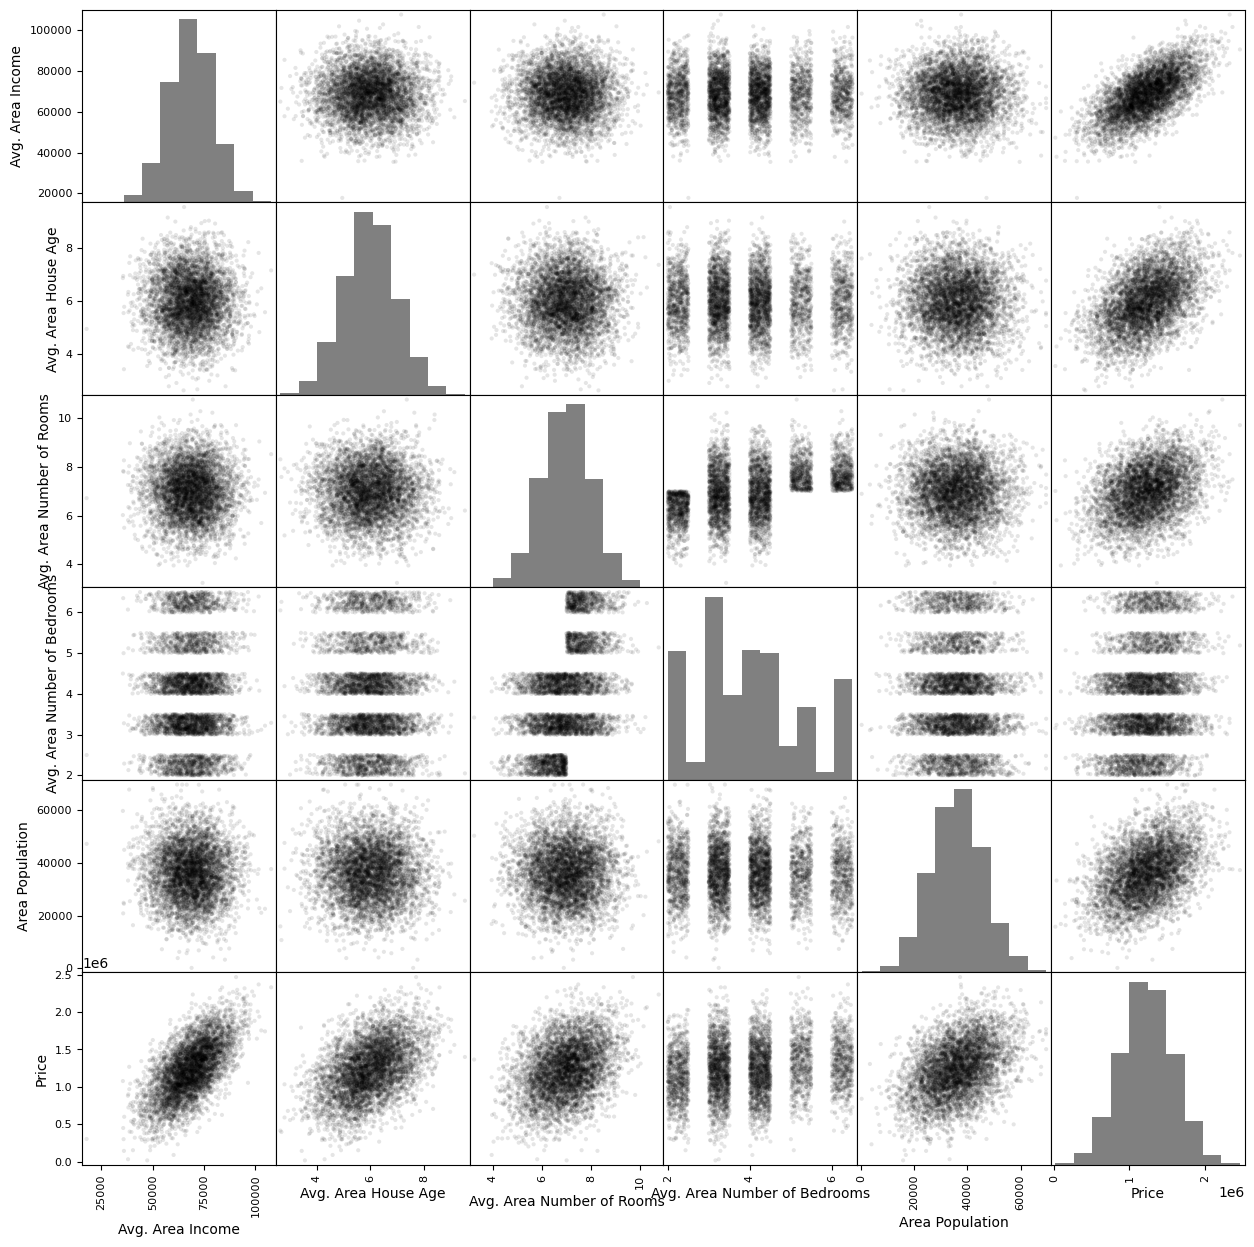

In [36]:
pd_plot.scatter_matrix(df, alpha = 0.1,                
    figsize=(15, 15),color = 'black', hist_kwds={'color':['grey']})
plt.show()

Plotting histograms for features:

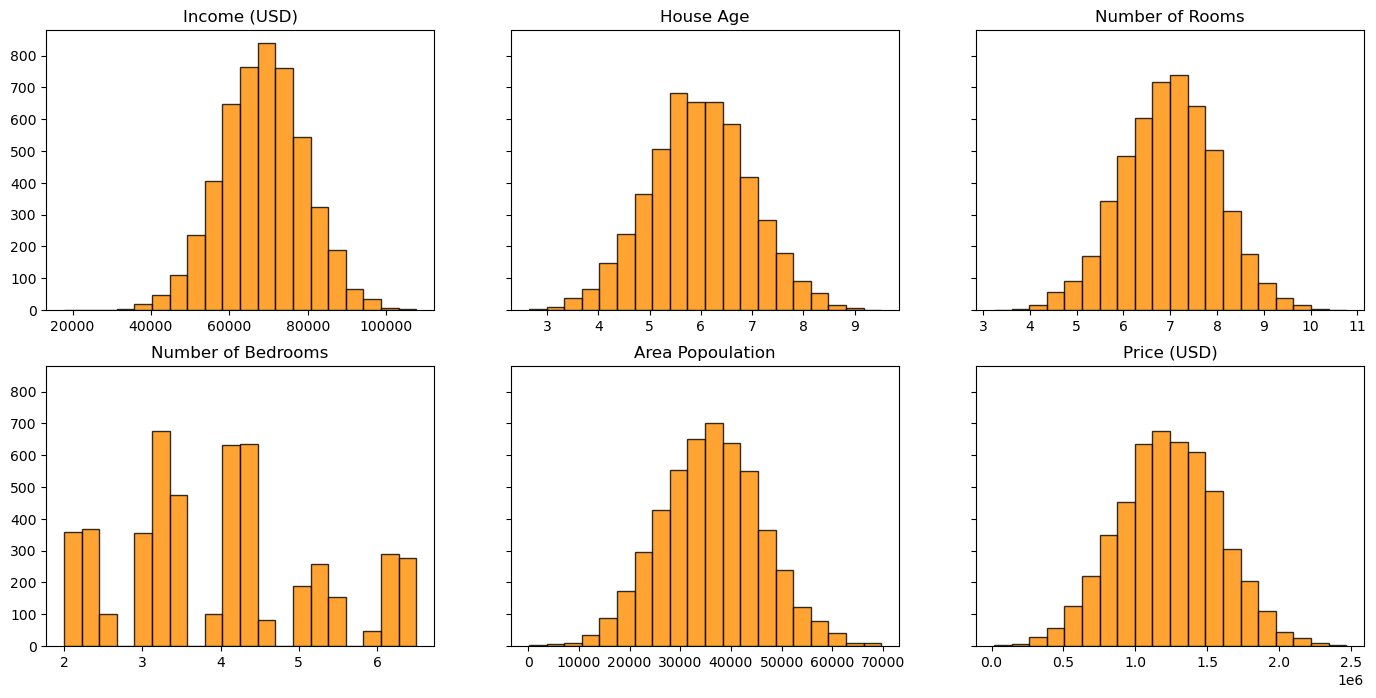

In [40]:
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharey=True,figsize=(17,8)) # plot histograms
ax1.hist(df["Avg. Area Income"], alpha = 0.8, color = 'darkorange', edgecolor = 'black', bins=20)
ax1.set_title('Income (USD)')
ax2.hist(df["Avg. Area House Age"], alpha = 0.8, color = 'darkorange', edgecolor = 'black', bins=20)
ax2.set_title('House Age')
ax3.hist(df["Avg. Area Number of Rooms"], alpha = 0.8, color = 'darkorange', edgecolor = 'black', bins=20)
ax3.set_title('Number of Rooms')
ax4.hist(df['Avg. Area Number of Bedrooms'], alpha = 0.8, color = 'darkorange', edgecolor = 'black', bins = 20)
ax4.set_title('Number of Bedrooms')
ax5.hist(df['Area Population'], alpha = 0.8, color = 'darkorange', edgecolor = 'black', bins = 20)
ax5.set_title('Area Popoulation')
ax6.hist(df['Price'], alpha = 0.8, color = 'darkorange', edgecolor = 'black', bins = 20)
ax6.set_title('Price (USD)')
plt.show()

The data looks good to work with.

Visualizing income and population predictor features and price:

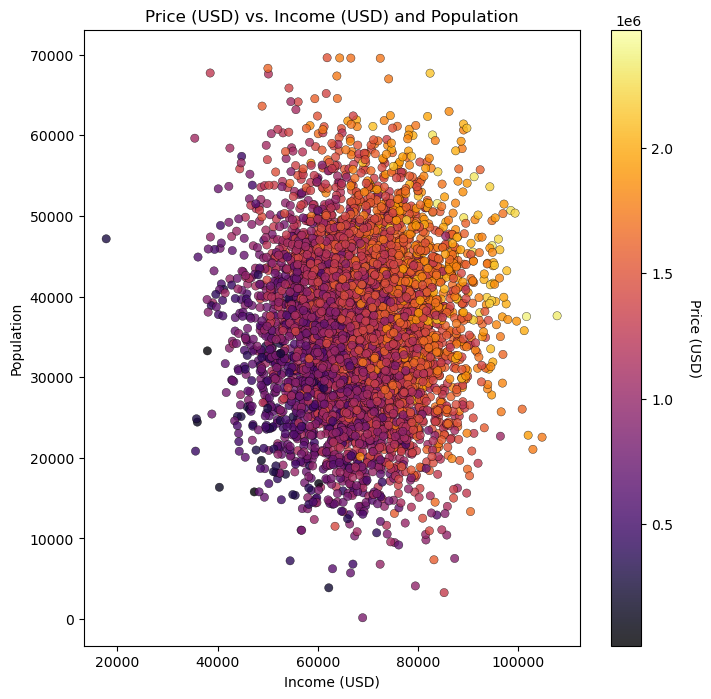

In [41]:
plt.figure(figsize=(8,8))                                
im = plt.scatter(df["Avg. Area Income"],df["Area Population"],s=None, c=df['Price'], marker=None, cmap=cmap, norm=None, vmin=None, vmax=None, alpha=0.8, linewidths=0.3, edgecolors="black")
plt.title('Price (USD) vs. Income (USD) and Population'); 
plt.xlabel('Income (USD)'); 
plt.ylabel('Population')
cbar = plt.colorbar(im, orientation = 'vertical')
cbar.set_label("Price (USD)", rotation=270, labelpad=20)
plt.show()

### 2. Building Base Model

The following model acts as a base model to compare with when exploring the effects of different parameters/hyperparameters on the model. The base model has the following features: maximum depth = 15, number of trees = 300, features = 2, minimum weight fraction in a leaf = 0. When a parameter is being explored, the other parameters are set to the base model values.

Mean Squared Error on Testing =  249805.14 , Variance Explained = 0.49 Cor = 0.7


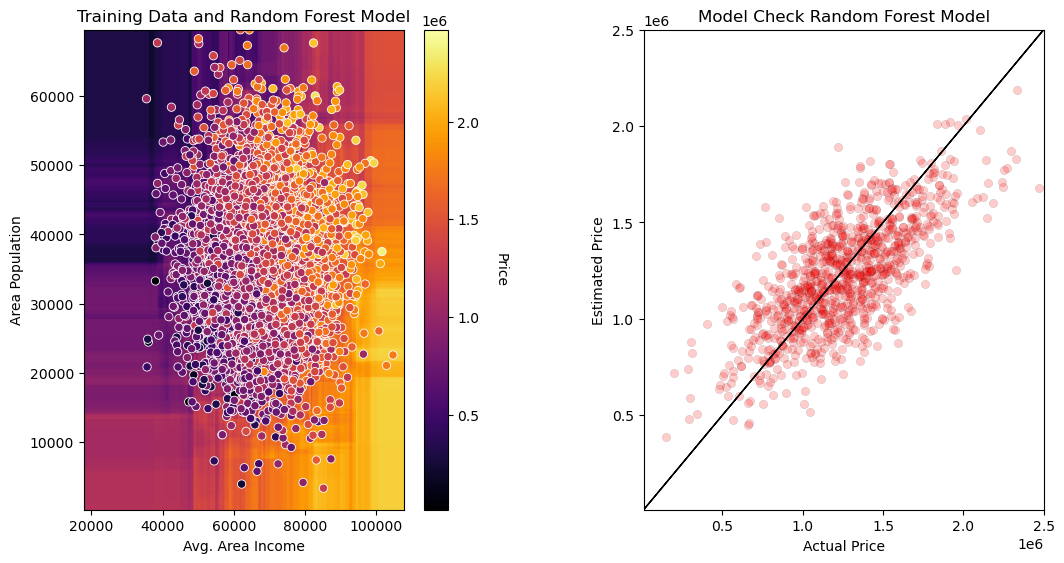

In [42]:
max_depth = 15
num_tree = 30
max_features = 2

forest = RandomForestRegressor(max_depth=max_depth,n_estimators=num_tree, max_features=max_features, min_weight_fraction_leaf = 0)
predictors = df_train[['Avg. Area Income','Area Population']]
response = df_train[['Price']] 
forest.fit(X = predictors, y = response)

plt.subplot(121)                                           
visualize_model(forest,df_train["Avg. Area Income"], income_min, income_max, df_train["Area Population"], pop_min, pop_max, df_train['Price'], price_min, price_max,'Training Data and Random Forest Model')
plt.subplot(122)                                            
check_model(forest,df_test["Avg. Area Income"],df_test["Area Population"], df_test["Price"],'Model Check Random Forest Model')
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.5, top=1.0, wspace=0.4, hspace=0.2)

Ensuring both features have significant effect on the model:

In [43]:
forest.feature_importances_

array([0.62089245, 0.37910755])

### 3. Effect of minimum weighted fraction on model:

This portion explores the effect of the minimum weighted fraction of the sum total of weights (of all input samples) required to be at a leaf node. Samples have equal weights. This parameter is specific with "min_weight_fraction_leaf", which goes from 0 to 0.5.

Text(0, 0.5, 'Mean error')

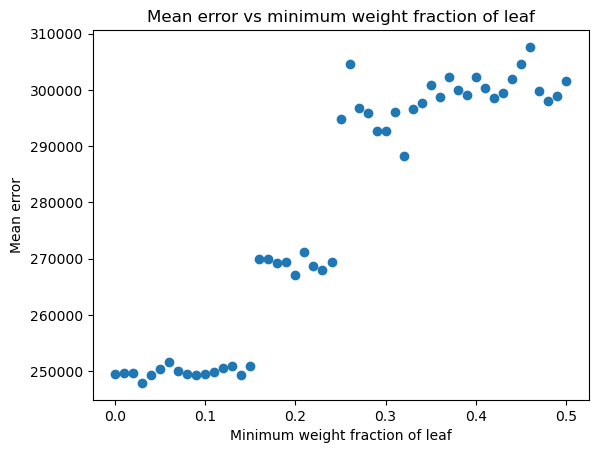

In [44]:
max_depth = 15
num_tree = 30
max_features = 2

i = 0
weight_fraction = 0
mean_error = 0
merror_list = []
while i < 51:

    my_first_forest2 = RandomForestRegressor(max_depth=max_depth,n_estimators=num_tree, max_features=max_features, min_weight_fraction_leaf = round(weight_fraction,1))
    predictors = df_train[['Avg. Area Income','Area Population']]
    response = df_train[['Price']] 

    my_first_forest2.fit(X = predictors, y = response)
    mean_error = check_model2(my_first_forest2,df_test["Avg. Area Income"],df_test["Area Population"], df_test["Price"],'Model Check Random Forest Model')
    merror_list.append(mean_error)
    
    i += 1
    weight_fraction += 0.01
    
fractions = np.linspace(0,0.5,51)

plt.scatter(fractions,merror_list)
plt.title('Mean error vs minimum weight fraction of leaf')
plt.xlabel('Minimum weight fraction of leaf')
plt.ylabel('Mean error')

It can be observed that increasing minimum weighted fractions results in higher error in step-wise fashion. A minimum weight error can be taken at minimum weighted fraction of 0.03.

### 4. Effect of Number of Features

Text(0, 0.5, 'Mean Error')

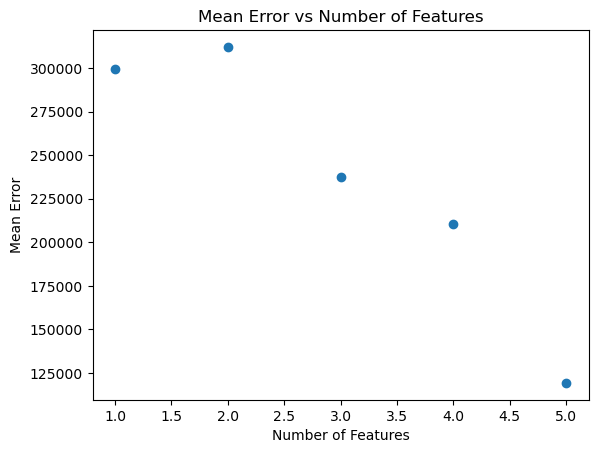

In [45]:
mean_error_features = []

max_depth = 15
num_tree = 30

max_features = 1
my_fifth_forest = RandomForestRegressor(max_depth = max_depth, n_estimators = num_tree, max_features=max_features, min_weight_fraction_leaf=0)
predictors = df_train[['Avg. Area Income']]
response = df_train[['Price']]
my_fifth_forest.fit(X = predictors, y = response)
mean_error_1features = mean_error1(my_fifth_forest, df_test['Avg. Area Income'], df_test['Price'])
#print(mean_error_1features)
mean_error_features.append(mean_error_1features)


my_forest = RandomForestRegressor(max_depth=max_depth,n_estimators=num_tree, max_features=max_features, min_weight_fraction_leaf = round(weight_fraction,1))
predictors = df_train[['Avg. Area Income','Area Population']]
response = df_train[['Price']] 
my_forest.fit(X = predictors, y = response)
mean_error_2features = check_model2(my_forest,df_test["Avg. Area Income"],df_test["Area Population"], df_test["Price"],'Model Check Random Forest Model')
mean_error_features.append(mean_error_2features)


max_features = 3
my_second_forest = RandomForestRegressor(max_depth=max_depth,n_estimators=num_tree, max_features=max_features, min_weight_fraction_leaf = 0)
predictors = df_train[['Avg. Area Income','Area Population','Avg. Area Number of Bedrooms']]
response = df_train[['Price']]
my_second_forest.fit(X = predictors, y = response)
mean_error_3features = mean_error3(my_second_forest, df_test['Avg. Area Income'], df_test['Area Population'], df_test['Avg. Area Number of Bedrooms'], df_test['Price'])
#print(mean_error_3features)
mean_error_features.append(mean_error_3features)

max_features = 4
my_third_forest = RandomForestRegressor(max_depth = max_depth, n_estimators = num_tree, max_features=max_features, min_weight_fraction_leaf=0)
predictors = df_train[['Avg. Area Income','Area Population','Avg. Area Number of Bedrooms','Avg. Area Number of Rooms']]
response = df_train[['Price']]
my_third_forest.fit(X = predictors, y = response)
mean_error_4features = mean_error4(my_third_forest, df_test['Avg. Area Income'], df_test['Area Population'], df_test['Avg. Area Number of Bedrooms'],df_test['Avg. Area Number of Rooms'], df_test['Price'])
#print(mean_error_4features)
mean_error_features.append(mean_error_4features)

max_features = 5
my_fourth_forest = RandomForestRegressor(max_depth = max_depth, n_estimators = num_tree, max_features=max_features, min_weight_fraction_leaf=0)
predictors = df_train[['Avg. Area Income','Area Population','Avg. Area Number of Bedrooms','Avg. Area Number of Rooms', 'Avg. Area House Age']]
response = df_train[['Price']]
my_fourth_forest.fit(X = predictors, y = response)
mean_error_5features = mean_error5(my_fourth_forest, df_test['Avg. Area Income'], df_test['Area Population'], df_test['Avg. Area Number of Bedrooms'],df_test['Avg. Area Number of Rooms'],df_test['Avg. Area House Age'], df_test['Price'])
#print(mean_error_5features)
mean_error_features.append(mean_error_5features)



features = np.linspace(1,5,5)
plt.scatter(features,mean_error_features)
plt.title('Mean Error vs Number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Mean Error')

Including "average area population" after "average area income" actually increased the error. From hereonafter, more features result in significantly lower errors (no dimishing returns reached for including all available predictor features). Such analysis of error vs number of features can allow us to determine how many features to include in the model (more features without lower error is a waste of computational power and time).

### 5. Effect of Maximum Tree Depth

Text(0, 0.5, 'Mean Error')

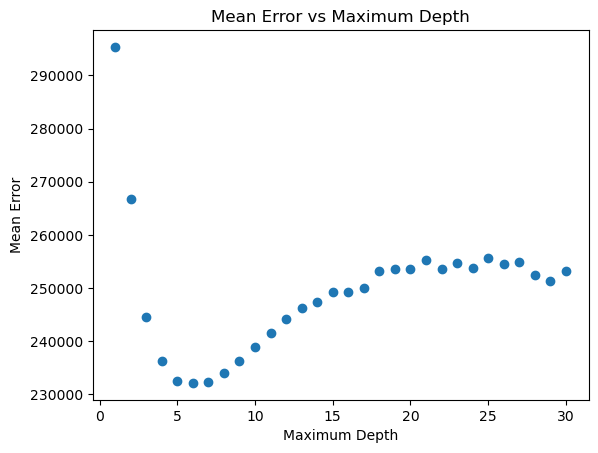

In [46]:
num_tree = 30
max_features = 2

max_depths = 1
mean_error_depth = 0
merror_list_depth = []
while max_depths < 31:

    my_first_forest3 = RandomForestRegressor(max_depth=max_depths,n_estimators=num_tree, max_features=max_features, min_weight_fraction_leaf = 0)
    predictors = df_train[['Avg. Area Income','Area Population']]
    response = df_train[['Price']] 

    my_first_forest3.fit(X = predictors, y = response)
    mean_error_depth = check_model2(my_first_forest3,df_test["Avg. Area Income"],df_test["Area Population"], df_test["Price"],'Model Check Random Forest Model')
    merror_list_depth.append(mean_error_depth)
    
    max_depths += 1


depths = np.linspace(1,30,30)


plt.scatter(depths,merror_list_depth)
plt.title('Mean Error vs Maximum Depth')
plt.xlabel('Maximum Depth')
plt.ylabel('Mean Error')

As maximum tree depth increases, error goes down to a minimum and then goes up to eventually reach a stable value. There is a minimum for mean error at a maximum depth of 6.

### 6. Effect of Number of Trees

Text(0, 0.5, 'Mean Error')

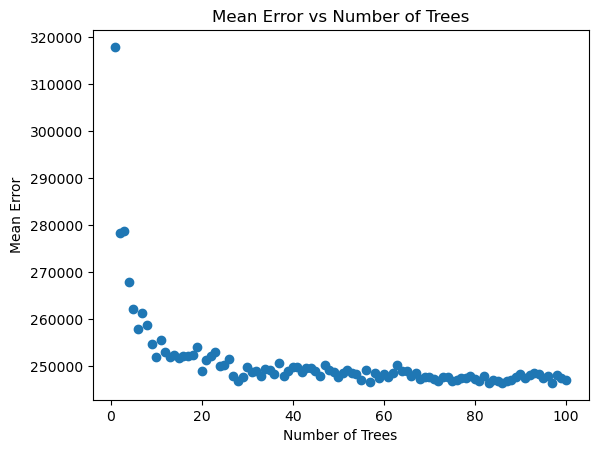

In [47]:
#This block takes a few minutes to run.
max_features = 2
max_depth = 15

num_trees = 1
mean_error_tree = 0
merror_list_tree = []
while num_trees < 101:

    my_first_forest4 = RandomForestRegressor(max_depth=max_depth,n_estimators=num_trees, max_features=max_features, min_weight_fraction_leaf = 0)
    predictors = df_train[['Avg. Area Income','Area Population']]
    response = df_train[['Price']] 

    my_first_forest4.fit(X = predictors, y = response)
    mean_error_tree = check_model2(my_first_forest4,df_test["Avg. Area Income"],df_test["Area Population"], df_test["Price"],'Model Check Random Forest Model')
    merror_list_tree.append(mean_error_tree)
    
    num_trees += 1


trees = np.linspace(1,100,100)


plt.scatter(trees,merror_list_tree)
plt.title('Mean Error vs Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Mean Error')

The error goes down with increasing number of trees. However, a point of dimishing returns is reached eventually. In this case, it is at about 40 trees.

### Results 

The error plots shown above display the results. These plots show how the error, and thus the model, behaves as the selected parameteres change over a range. The analysis provides a methodology to select the best parameters for random forest regeression.


I hope this was helpful,

*Feras Alsheikh*

feras21@utexas.edu

___________________

#### Work Supervised by:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin
